<a href="https://colab.research.google.com/github/JayJay9x/JAYSTORE_YOUBUYSOMETHING/blob/main/companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Making investing firm by diving in the dataset of Unicorn Companies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
companies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unicorn_Companies_project/Unicorn_Companies.csv')

In [5]:
# Let see what we have!
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [6]:
# More detail.
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [15]:
# Date Joined to datetime.
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
# Any duplicated record here?
companies.duplicated().sum()

<ipython-input-15-c0d71b48e1b2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


0

There are no need to drop_duplicates right!

Let begin the EDA journey!

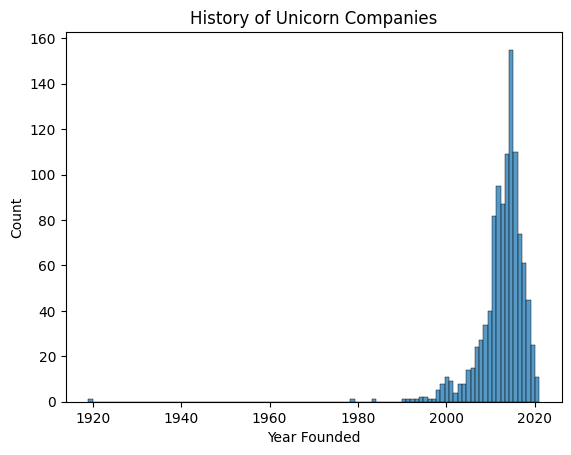

In [12]:
# Discover the unicorn companies history.
companies['Year Founded'].sort_values().value_counts()
sns.histplot(companies['Year Founded'])
plt.title('History of Unicorn Companies')
plt.show()

I have the statement that the old comapanies have the less chance to become Unicorn.

In [53]:
''' To make deeper understanding in the route of Unicorn companies,
I will consider how long it takes to become Unicorn of each Insdustry.'''

companies['Year To Join'] = companies['Date Joined'].dt.year - companies['Year Founded']
route_to_unicorn = companies.groupby('Industry')['Year To Join'].mean().round(2).sort_values(ascending=True).reset_index()

In [43]:
# prompt: convert the currency as B to billion in Valuation and M to Million in Funding

def convert_currency(val):
  """Converts currency values from 'B' to billion and 'M' to million."""
  if isinstance(val, str):
    if val.endswith('B'):
      return float(int(val[1:-1])) * 1000000000
    elif val.endswith('M'):
      return float(int(val[1:-1])) * 1000000
    else:
      return 0
  return val


companies['Valuation'] = companies['Valuation'].apply(convert_currency).astype(float)
companies['Funding'] = companies['Funding'].apply(convert_currency).astype(float)
companies['Profit Returns'] = companies['Valuation'] - companies['Funding']
companies

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year To Join,Profit Returns
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5,1.720000e+11
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,9.300000e+10
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10,9.800000e+10
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4,9.300000e+10
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6,4.200000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital",5,6.210000e+08
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,9.900000e+08,"58.com, Tencent Holdings",2,1.000000e+07
1071,Zihaiguo,1.000000e+09,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,8.000000e+07,"Xingwang Investment Management, China Capital ...",3,9.200000e+08
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, North...",16,2.080000e+08


In [57]:
ROI_unicorn = companies.groupby('Industry')['Profit Returns'].mean().round(2).sort_values(ascending=True).reset_index()
result_table = pd.merge(route_to_unicorn, ROI_unicorn, on='Industry', how='left')
result_table

,Industry,Year To Join,Profit Returns
0,Auto & transportation,5.03,2.062129e+09
1,Artificial Intelligence,5.36,1.193000e+09
2,Hardware,5.94,2.282794e+09
3,Artificial intelligence,5.97,4.343493e+09
4,Mobile & telecommunications,6.32,1.950421e+09
5,E-commerce & direct-to-consumer,6.43,3.167234e+09
6,Fintech,6.54,3.455375e+09
7,Travel,6.57,2.383857e+09
8,Cybersecurity,6.80,2.141360e+09
9,"Supply chain, logistics, & delivery",6.93,2.326439e+09


from matplotlib import pyplot as plt
result_table['Year To Join'].plot(kind='hist', bins=20, title='Year To Join')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_table['Profit Returns'].plot(kind='hist', bins=20, title='Profit Returns')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_table.plot(kind='scatter', x='Year To Join', y='Profit Returns', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year To Join']
  ys = series['Profit Returns']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_table.sort_values('Year To Join', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year To Join')
_ = plt.ylabel('Profit Returns')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year To Join']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year To Join'}, axis=1)
              .sort_values('Year To Join', ascending=True))
  xs = counted['Year To Join']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_table.sort_values('Year To Join', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year To Join')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
result_table['Year To Join'].plot(kind='line', figsize=(8, 4), title='Year To Join')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_table['Profit Returns'].plot(kind='line', figsize=(8, 4), title='Profit Returns')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
# The average time and ammount for those investing firm
avg_investing = result_table.describe()
avg_investing

,Year To Join,Profit Returns
count,16.000000,1.600000e+01
mean,6.849375,2.663316e+09
std,1.007224,7.708162e+08
min,5.030000,1.193000e+09
25%,6.232500,2.198070e+09
50%,6.685000,2.465209e+09
75%,7.802500,3.180506e+09
max,8.190000,4.343493e+09


<ipython-input-70-a7c627fd4064>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=result_table, x= 'Year To Join', y= 'Profit Returns', palette='Set2', showfliers=True)


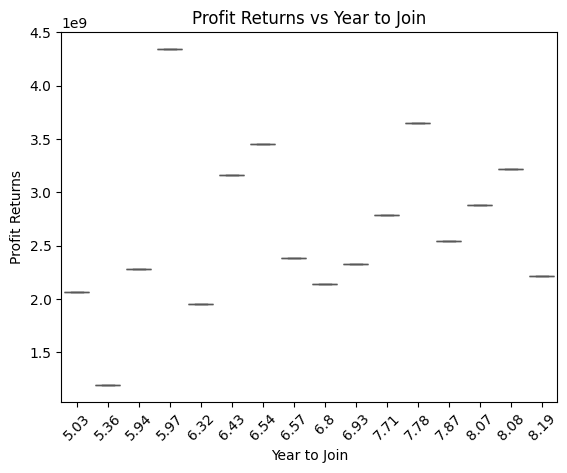

In [70]:
sns.boxplot(data=result_table, x= 'Year To Join', y= 'Profit Returns', palette='Set2', showfliers=True)
plt.xticks(rotation=45)
plt.xlabel('Year to Join')
plt.ylabel('Profit Returns')
plt.title('Profit Returns vs Year to Join')
plt.show()